In [29]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [30]:

# Load dataset
loan = pd.read_csv("/content/loan_data.csv")

In [31]:
# Check data
print(loan.head())
print(loan.isnull().sum())

   person_age person_gender person_education  person_income  person_emp_exp  \
0        22.0        female           Master        71948.0               0   
1        21.0        female      High School        12282.0               0   
2        25.0        female      High School        12438.0               3   
3        23.0        female         Bachelor        79753.0               0   
4        24.0          male           Master        66135.0               1   

  person_home_ownership  loan_amnt loan_intent  loan_int_rate  \
0                  RENT    35000.0    PERSONAL          16.02   
1                   OWN     1000.0   EDUCATION          11.14   
2              MORTGAGE     5500.0     MEDICAL          12.87   
3                  RENT    35000.0     MEDICAL          15.23   
4                  RENT    35000.0     MEDICAL          14.27   

   loan_percent_income  cb_person_cred_hist_length  credit_score  \
0                 0.49                         3.0           561  

In [32]:
# Feature selection
# -----------------------------
X = loan[['person_age',
          'person_income',
          'person_home_ownership',
          'loan_amnt',
          'loan_intent',
          'credit_score']]

y = loan['loan_status']

In [33]:
# Encode categorical variables
# -----------------------------
X_encoded = pd.get_dummies(
    X,
    columns=['person_home_ownership', 'loan_intent'],
    drop_first=True
)

In [34]:
# Train Logistic Regression
# -----------------------------
model = LogisticRegression(max_iter=1000)
model.fit(X_encoded, y)

LogisticRegression(max_iter=1000)

In [35]:
# Model evaluation
# -----------------------------
y_pred = model.predict(X_encoded)
accuracy = accuracy_score(y, y_pred)

print("Model Accuracy:", accuracy)

Model Accuracy: 0.8257333333333333


In [36]:
# User input for prediction
# -----------------------------
person_age = int(input("Enter the age: "))
person_income = int(input("Enter the income: "))
person_home_ownership = input("Enter home ownership (MORTGAGE, OTHER, OWN, RENT): ")
loan_amnt = int(input("Enter loan amount: "))
loan_intent = input("Enter loan intent (DEBTCONSOLIDATION, EDUCATION, HOMEIMPROVEMENT, MEDICAL, PERSONAL, VENTURE): ")
credit_score = int(input("Enter credit score: "))

Enter the age: 54
Enter the income: 45664
Enter home ownership (MORTGAGE, OTHER, OWN, RENT): RENT
Enter loan amount: 12543
Enter loan intent (DEBTCONSOLIDATION, EDUCATION, HOMEIMPROVEMENT, MEDICAL, PERSONAL, VENTURE): PERSONAL
Enter credit score: 546


In [37]:
# Create input DataFrame
input_data = pd.DataFrame([{
    'person_age': person_age,
    'person_income': person_income,
    'person_home_ownership': person_home_ownership,
    'loan_amnt': loan_amnt,
    'loan_intent': loan_intent,
    'credit_score': credit_score
}])

In [38]:
# Encode input data
input_encoded = pd.get_dummies(
    input_data,
    columns=['person_home_ownership', 'loan_intent'],
    drop_first=True
)

In [39]:
# Align input features with training features
input_encoded = input_encoded.reindex(columns=X_encoded.columns, fill_value=0)

In [40]:
# Prediction
# -----------------------------
prediction = model.predict(input_encoded)
prediction_prob = model.predict_proba(input_encoded)

print("Loan Status Prediction:", prediction[0])
print("Approval Probability:", prediction_prob)

Loan Status Prediction: 0
Approval Probability: [[0.62274635 0.37725365]]


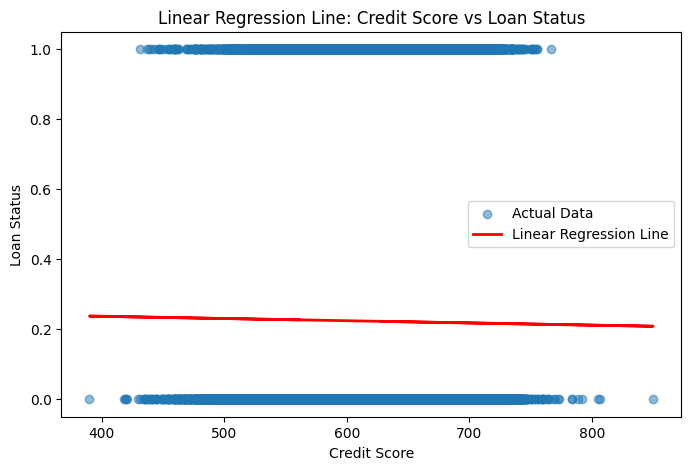

In [41]:
from sklearn.linear_model import LinearRegression

# Select single feature for plotting
X_lr = loan[['credit_score']]
y_lr = loan['loan_status']

# Train Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_lr, y_lr)

# Predict
y_lr_pred = lin_reg.predict(X_lr)

# Plot
plt.figure(figsize=(8,5))
plt.scatter(X_lr, y_lr, alpha=0.5, label='Actual Data')
plt.plot(X_lr, y_lr_pred, color='red', linewidth=2, label='Linear Regression Line')

plt.xlabel('Credit Score')
plt.ylabel('Loan Status')
plt.title('Linear Regression Line: Credit Score vs Loan Status')
plt.legend()
plt.show()


In [42]:
import pickle
with open("Loanapproval.pkl","wb") as f:
  pickle.dump(model,f)
from google.colab import files
files.download('Loanapproval.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>